In [1]:
import os 
from os import path
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
base_dir = os.path.abspath(os.curdir) + r'/data'

df = pd.read_csv(path.join(os.sep, base_dir, 'Exchange Rate TWI May 1970  Aug 1995.csv'))
df.head()

,Unnamed: 0,x
0,1,100.0
1,2,99.6
2,3,99.4
3,4,99.1
4,5,99.2


In [3]:
df.describe()

,Unnamed: 0,x
count,608.00000,608.000000
mean,304.50000,78.600329
std,175.65876,20.531258
min,1.00000,47.300000
25%,152.75000,58.875000
50%,304.50000,82.800000
75%,456.25000,97.900000
max,608.00000,121.300000


Графическое представление и описание поведения временного ряда

In [4]:
def plot_assignation(axp, data, xlabel, ylabel, title1):
    axp.plot(data)
    axp.set_xlabel(xlabel)
    axp.set_ylabel(ylabel)
    axp.set_title(title1 )

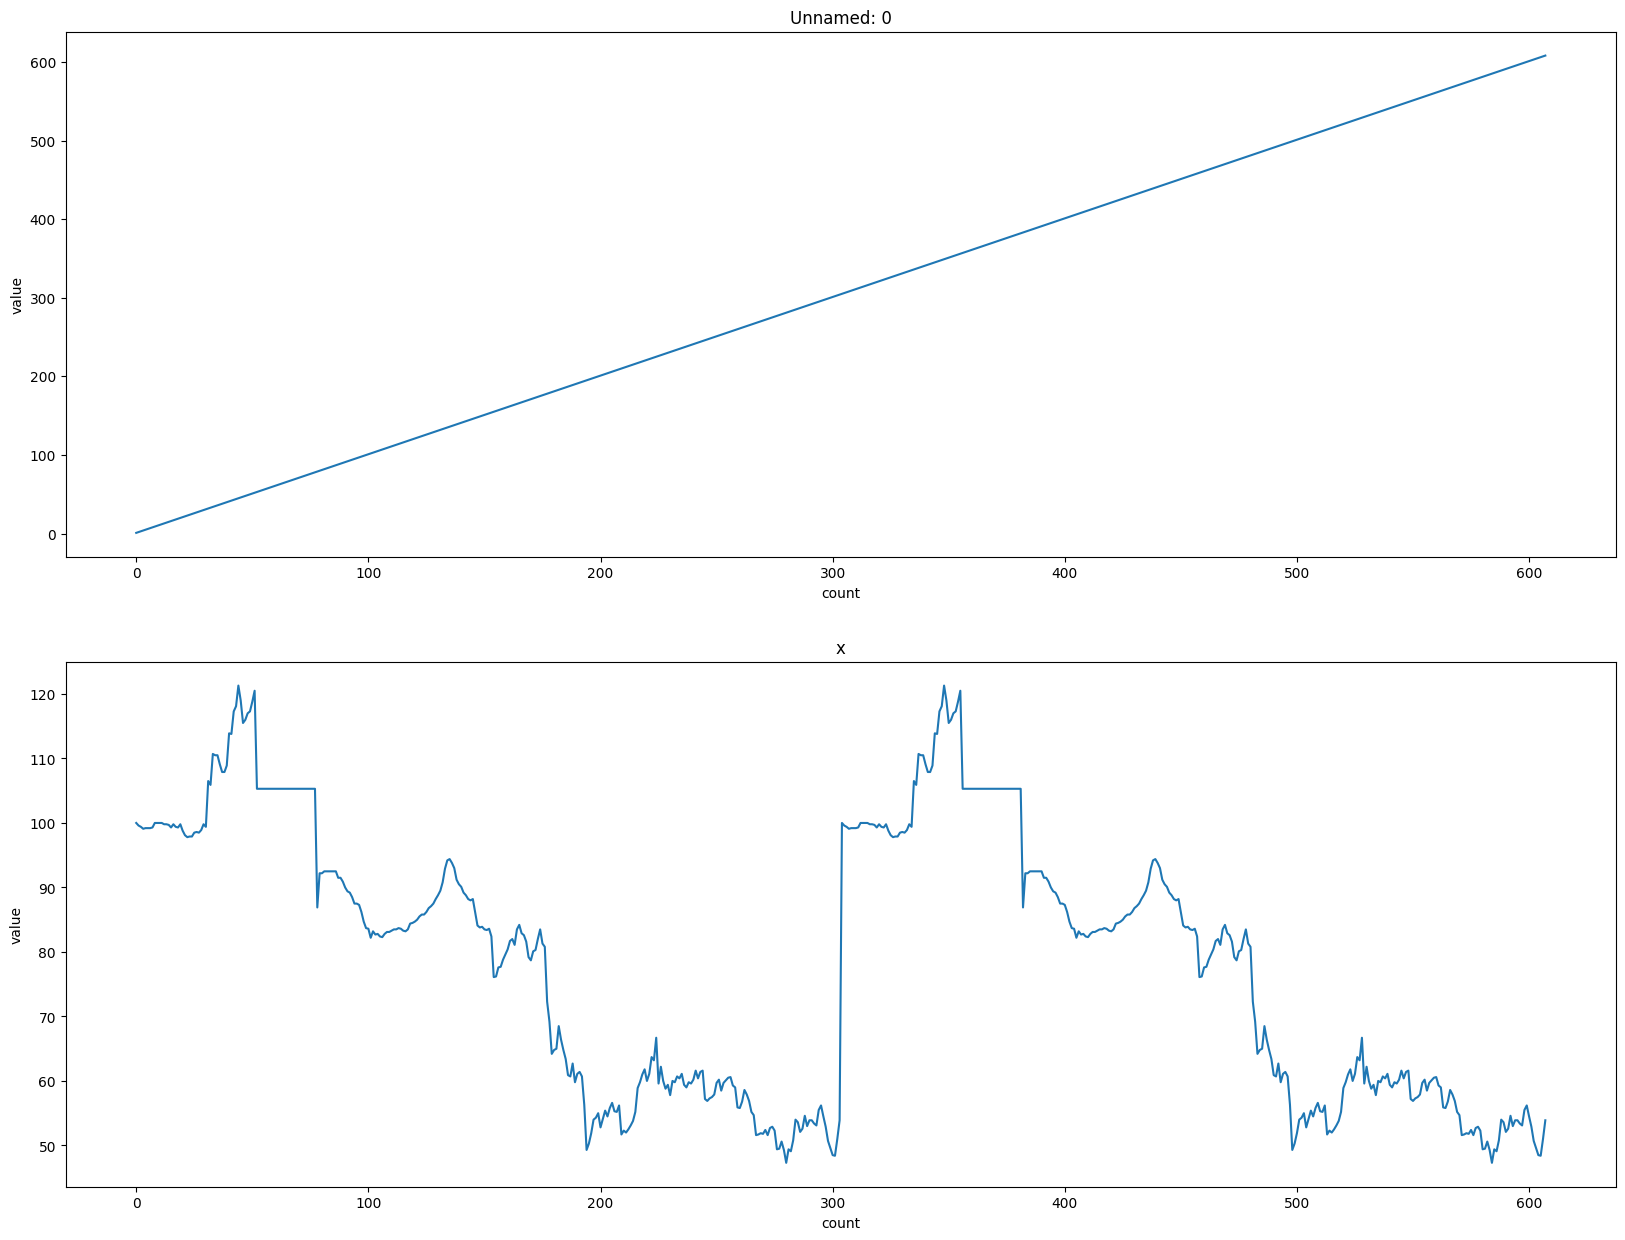

In [13]:
fig, axs = plt.subplots(2,1,figsize=(20, 15))

plot_assignation(axs[0], df["Unnamed: 0"], 'count', 'value','Unnamed: 0')

plot_assignation(axs[1], df["x"], "count", "value", "x")

Выделение закономерных (неслучайных) составляющих временного ряда
Разложения ряда на компоненты
Тренды, Сезонность, Остаточность

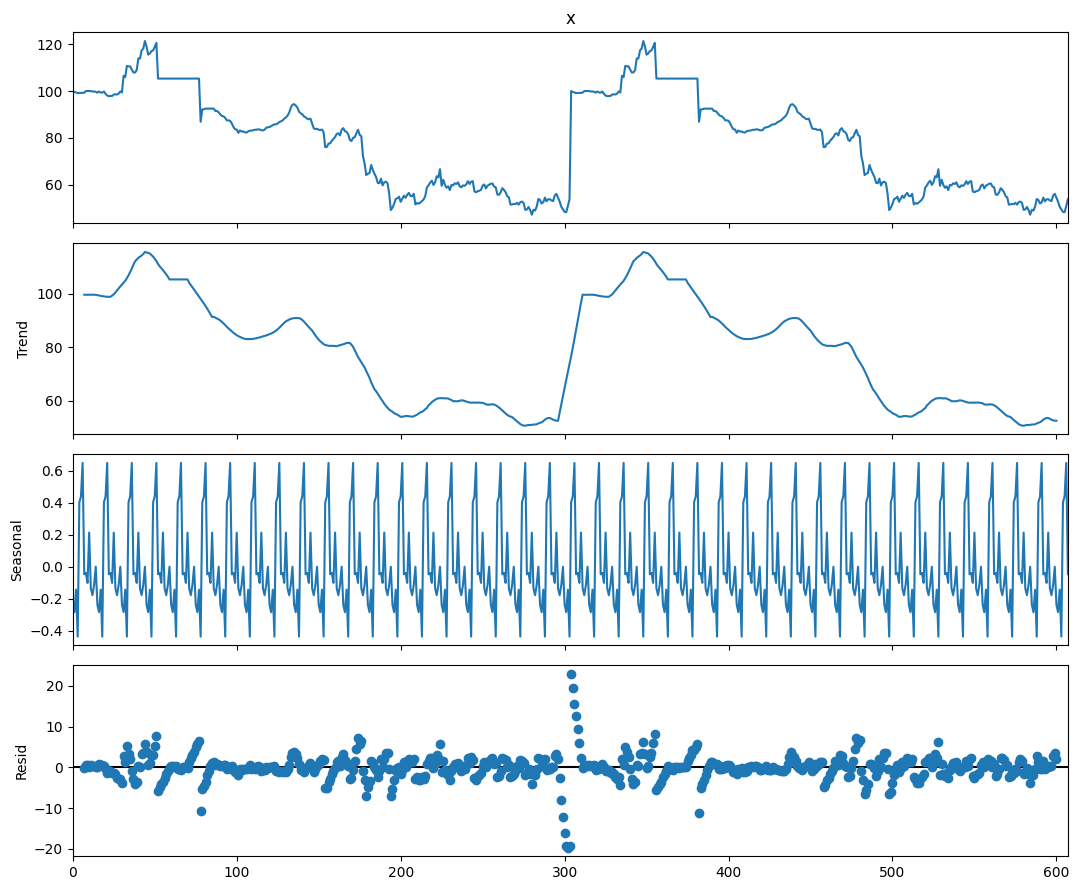

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose

from pylab import rcParams
rcParams['figure.figsize'] = 11, 9

decompose = seasonal_decompose(df["x"], period=15)
decompose.plot()
plt.show()

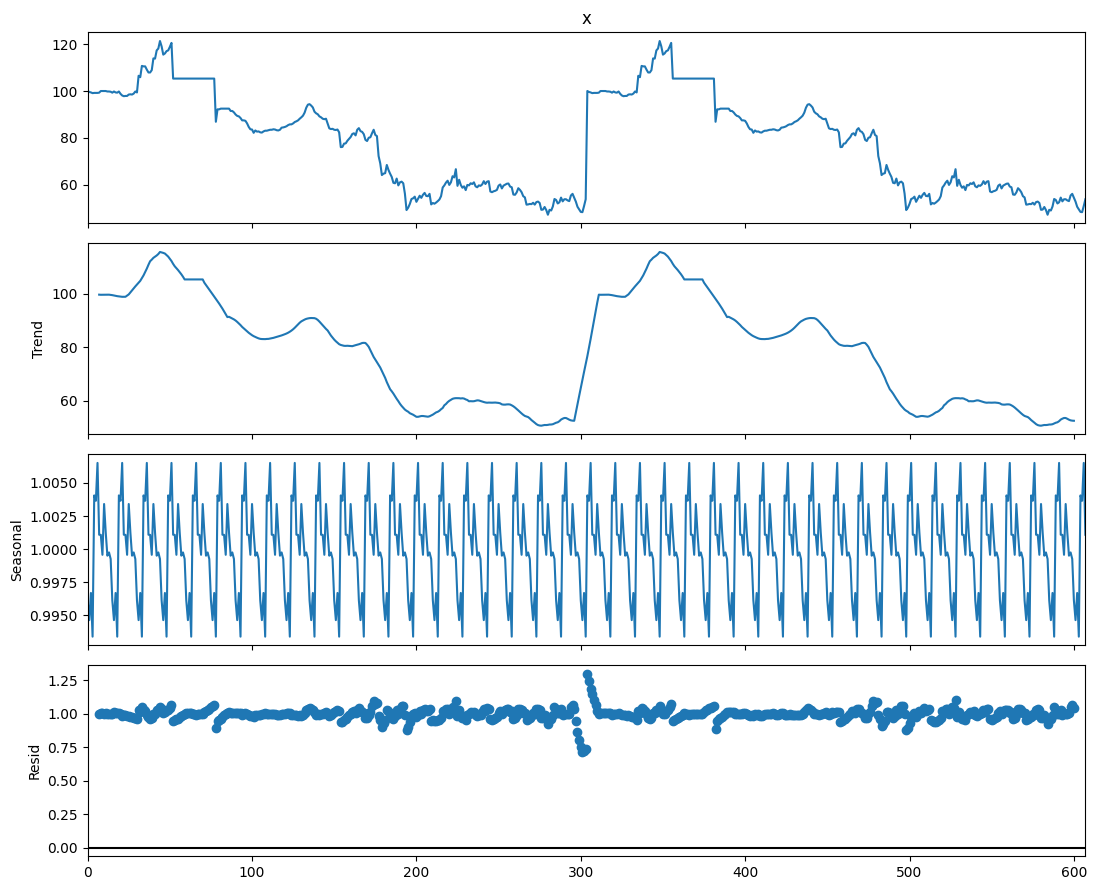

In [20]:
rcParams['figure.figsize']= 11, 9
decompose = seasonal_decompose(df['x'], period=15, model='multiplicative')
decompose.plot()
plt.show()

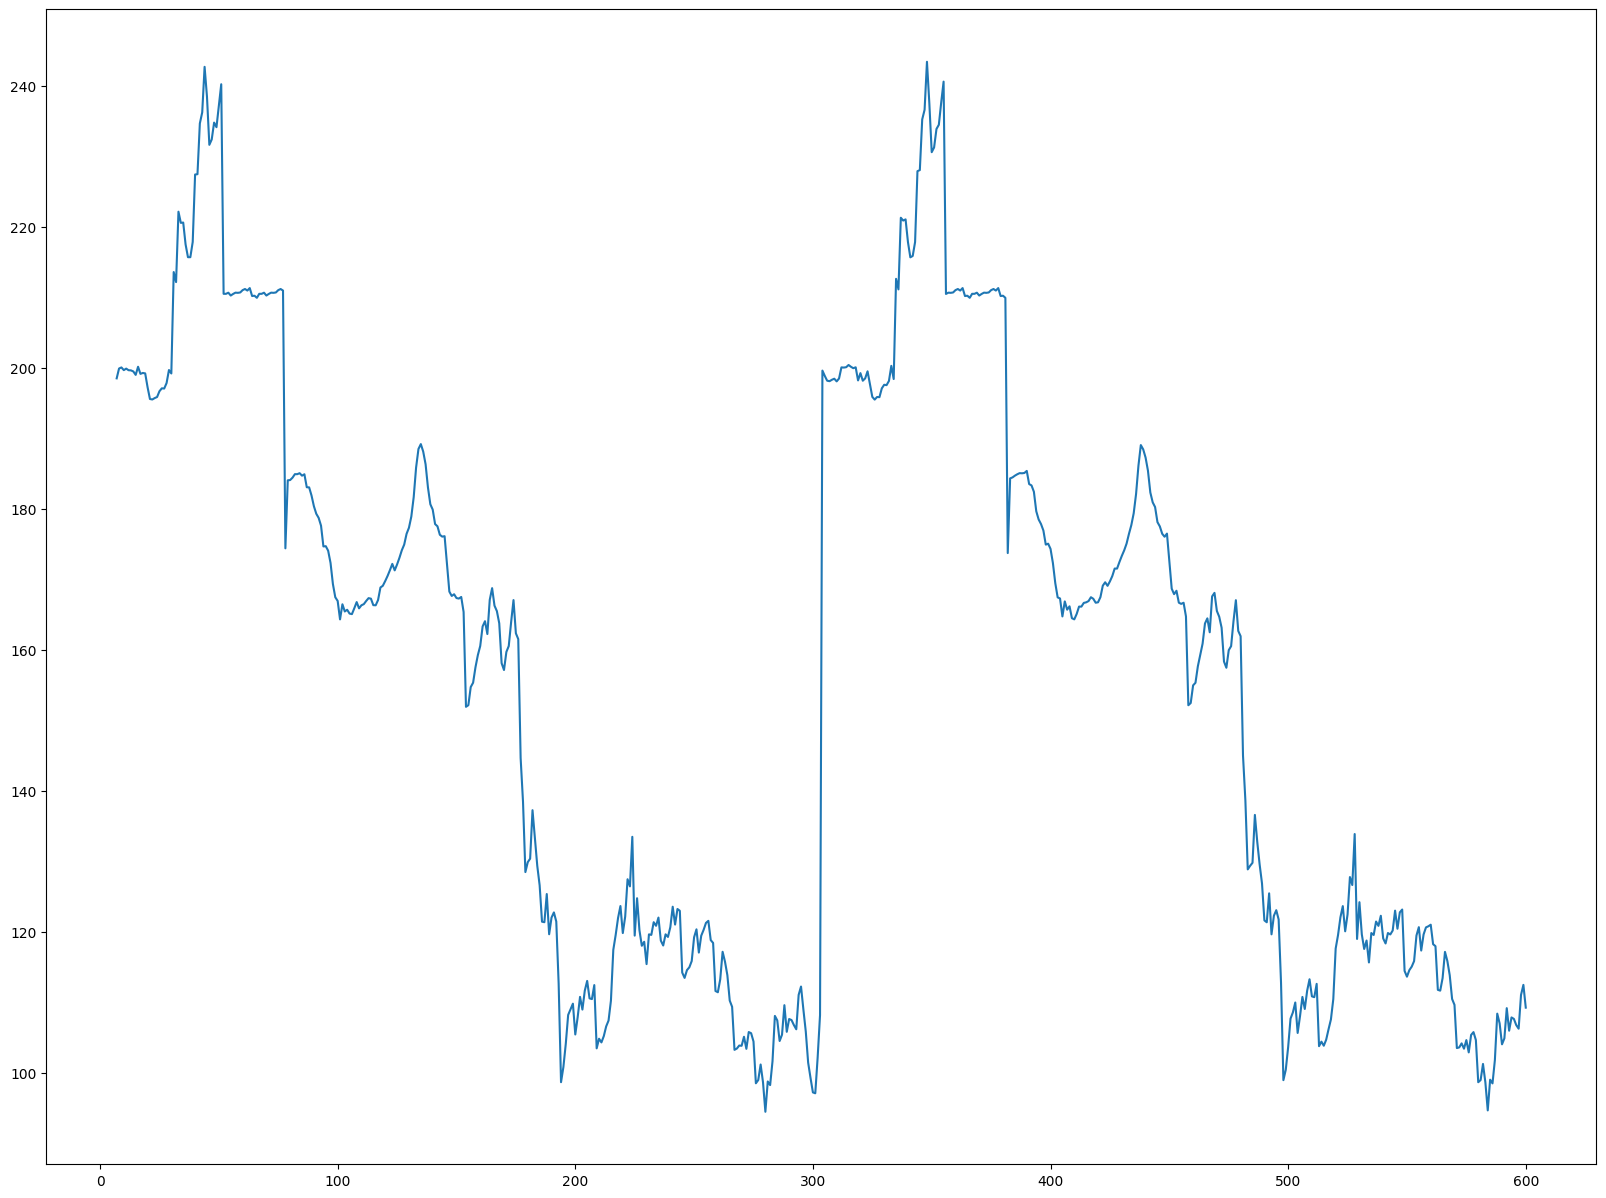

In [23]:
new_ps = decompose.trend*(decompose.seasonal+1)*decompose.resid

fig, axs = plt.subplots(figsize=(20, 15))
 
plt.plot(new_ps)
plt.show()

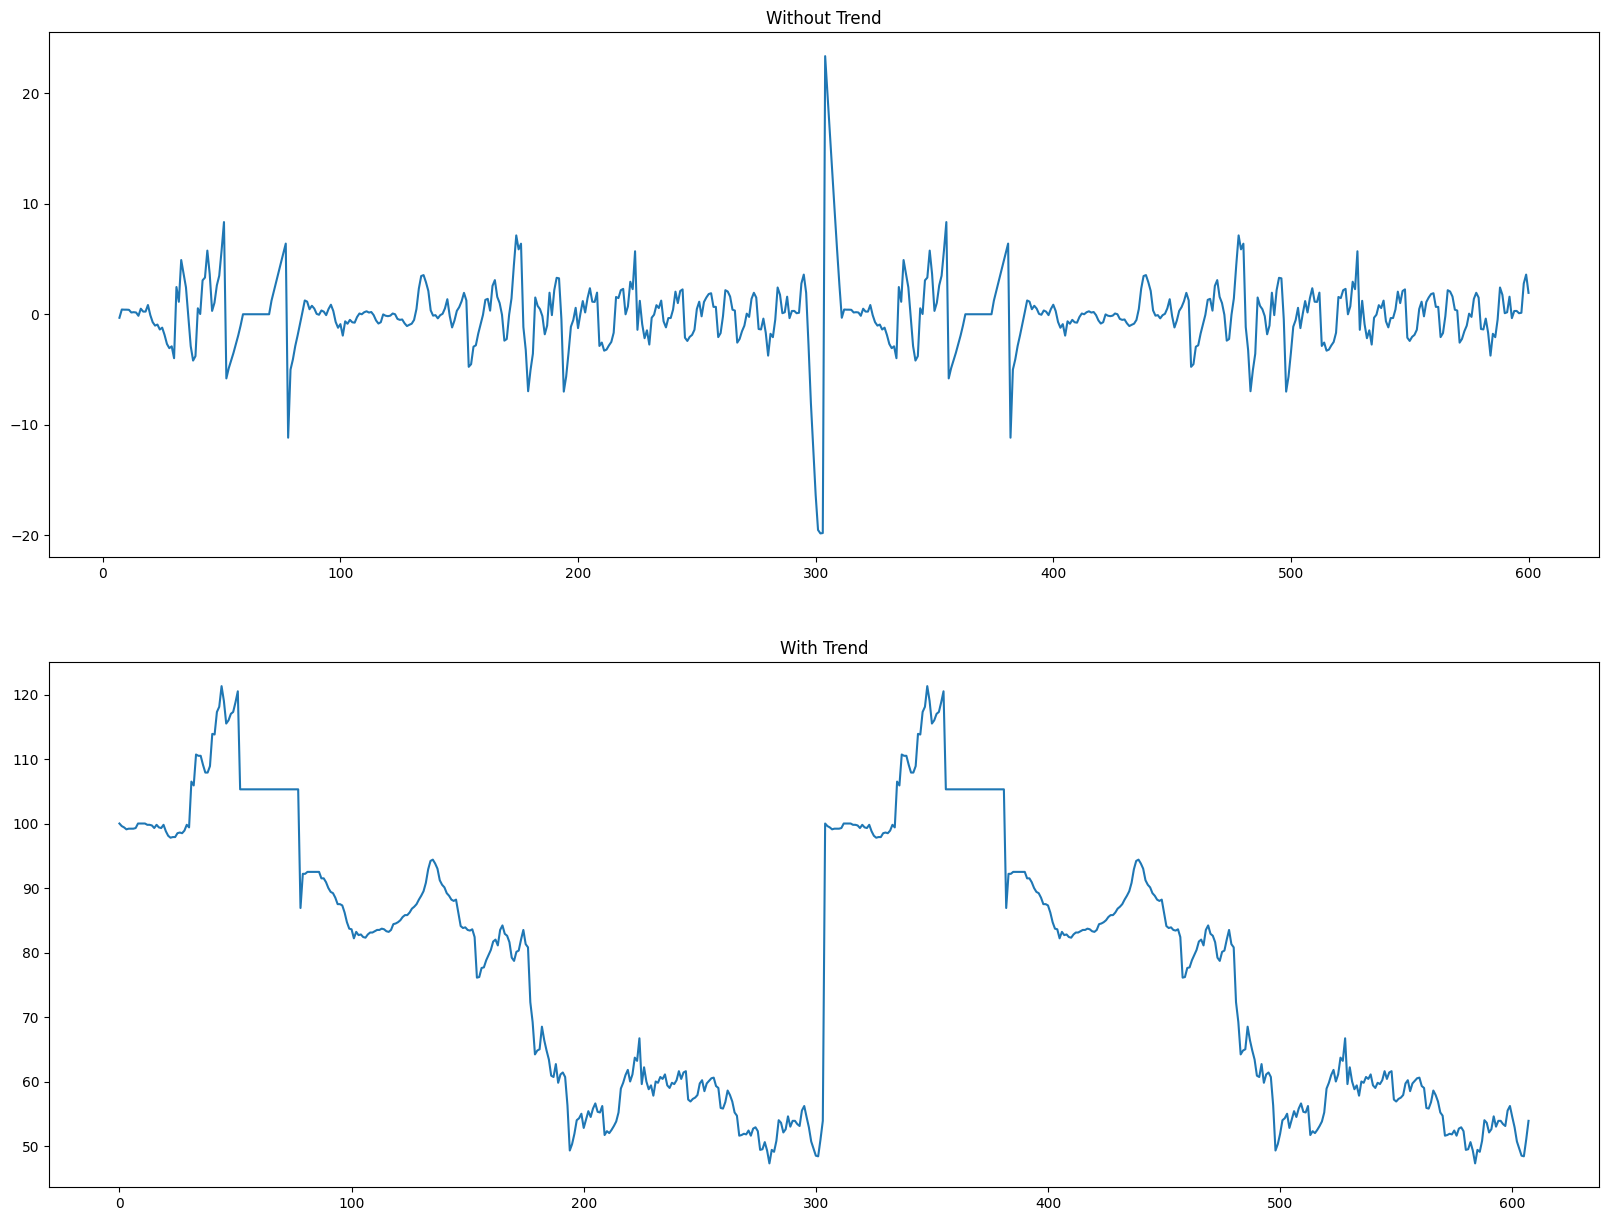

In [29]:
df_r = df["x"] - decompose.trend

fig, axs = plt.subplots(2,1,figsize=(20, 15))

plot_assignation(axs[0], df_r, '', '','Without Trend')
plot_assignation(axs[1], df["x"], '', '','With Trend')

Автокорреляция и коррелограмма

In [30]:
import statsmodels.tsa.api as smt

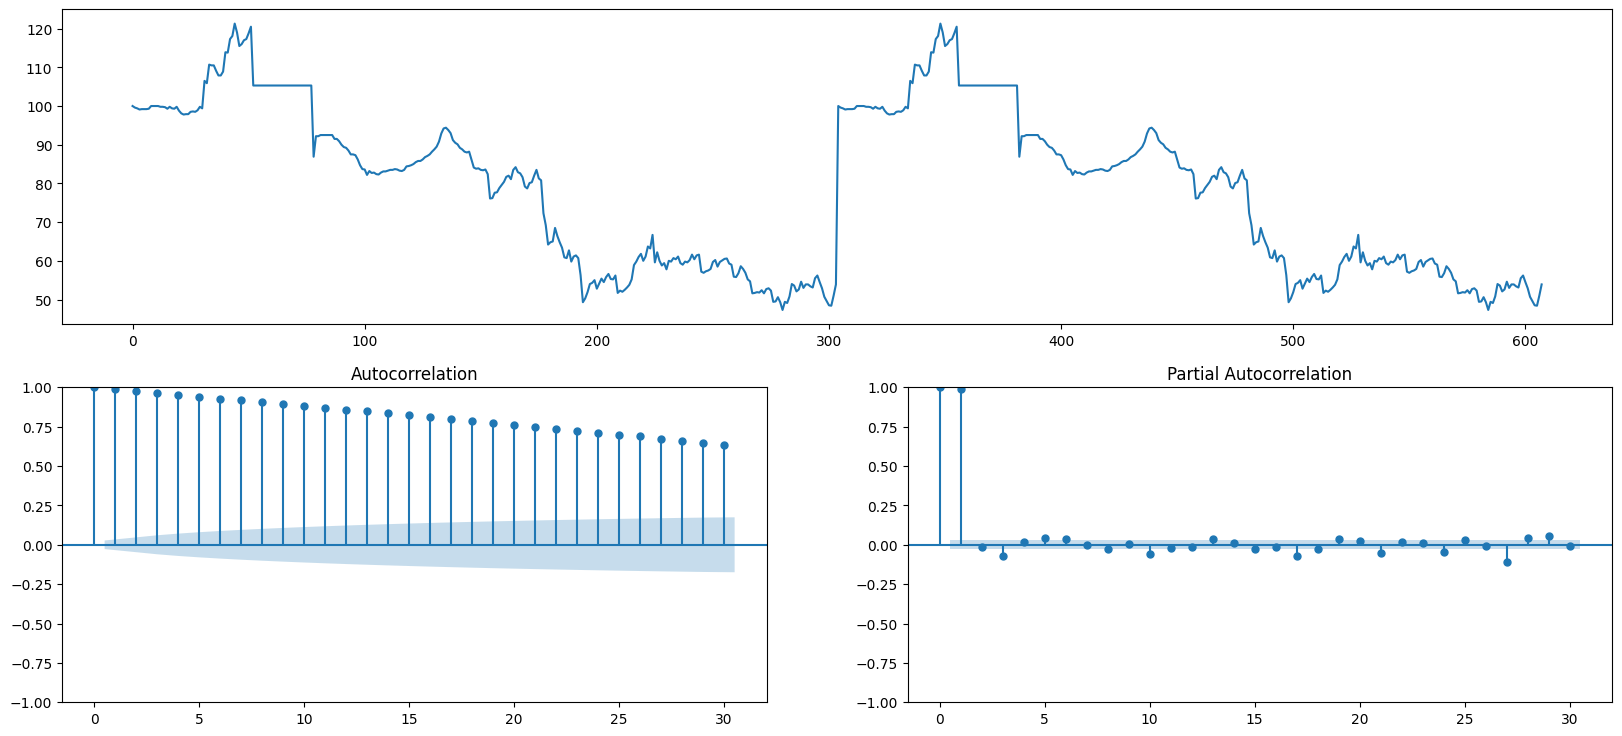

In [34]:
ts = df["x"]
fig = plt.figure(figsize=(20, 9))
layout = (2, 2)
ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
acf_ax = plt.subplot2grid(layout, (1, 0))
pacf_ax = plt.subplot2grid(layout, (1, 1))

ts.plot(ax=ts_ax)
smt.graphics.plot_acf(ts, lags=30, ax=acf_ax, alpha=0.5)
smt.graphics.plot_pacf(ts, lags=30, ax=pacf_ax, alpha=0.5)
None